In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


In [5]:
df = pd.read_csv('car_evaluation.csv')

In [6]:
import warnings

warnings.filterwarnings('ignore')

In [7]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
df.shape

(1727, 7)

# rename coloumn name 

In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [10]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Frequency distribution of values in variables¶
Now, I will check the frequency counts of categorical variables.

In [12]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())   

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


# Explore class variable

In [13]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

### Missing values in variables

In [14]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [15]:
X = df.drop(['class'], axis=1)

y = df['class']

### Split data into separate training and test set 

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [17]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [18]:

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [20]:
pip install category-encoders


  Obtaining dependency information for category-encoders from https://files.pythonhosted.org/packages/98/47/598b4bf0ccf6f02915e71bdd23fe846a27adc2d3ba734f2ba5215d8e44f5/category_encoders-2.6.4-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ----

In [21]:
# import category encoders

import category_encoders as ce

In [23]:
# encode variables with ordinal encoding#
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [24]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [25]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


# Decision Tree Classifier with criterion gini index 

In [26]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [27]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [28]:
y_pred_gini = clf_gini.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8053


In [30]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [31]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7848


In [32]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7848
Test set score: 0.8053


[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]')]

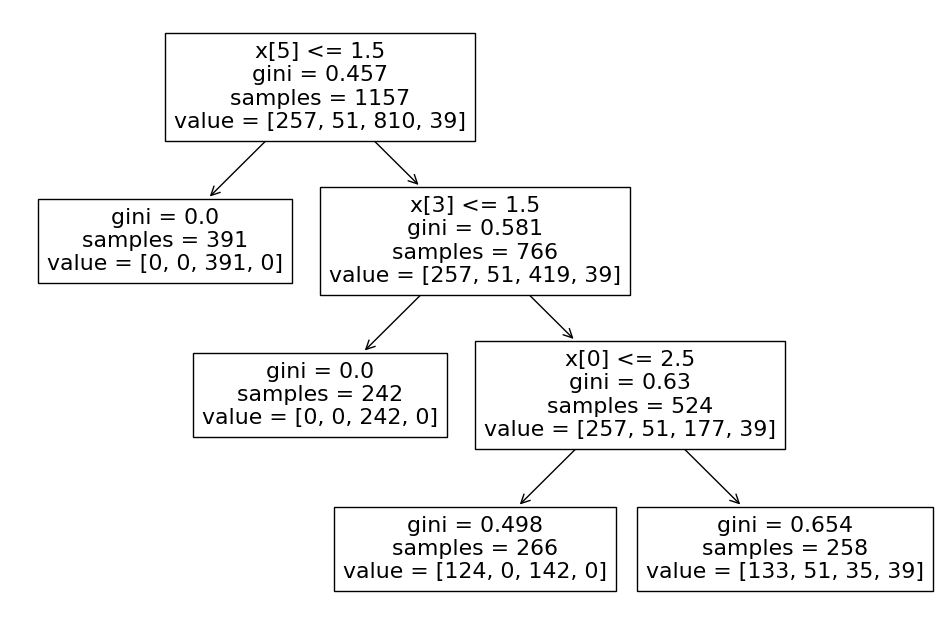

In [33]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 